# min(DALL·E)

### Install

In [ ]:
! nvidia-smi
! pip install min-dalle

Mon Apr  1 08:54:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Load Model
`float32` is faster than `float16` but uses more GPU memory.

In [ ]:
dtype = "float16" #@param ["float32", "float16", "bfloat16"]
from IPython.display import display, update_display
import torch
from min_dalle import MinDalle

model = MinDalle(
    dtype=getattr(torch, dtype),
    device='cuda',
    is_mega=True,
    is_reusable=True
)

using device cuda
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


### Generate Images

- `grid_size` Size of the image grid.  Reduce this if you run out of GPU memory.

- `progressive_outputs` Whether to show intermediate output.  Adds a small delay and increases memory usage.

- `seamless` Tiles the images in token space instead of pixel space

- `supercondition_factor` Higher values result in better agreement with the text but a narrower variety of generated images

- `top_k` Each image token is sampled from the top $k$ most probable tokens

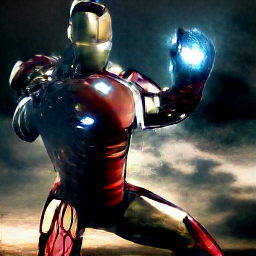

CPU times: user 13.1 s, sys: 29.6 ms, total: 13.1 s
Wall time: 13.5 s


In [ ]:
%%time

text = "iron man high resolution" #@param {type:"string"}
progressive_outputs = False #@param {type:"boolean"}
seamless = True #@param {type:"boolean"}
grid_size = 1 #@param {type:"integer"}
temperature = 14.49 #@param {type:"slider", min:0.01, max:16, step:0.01}
supercondition_factor = 1000 #@param {type:"number"}
top_k = 128 #@param {type:"integer"}

image_stream = model.generate_image_stream(
    text=text,
    seed=-1,
    grid_size=grid_size,
    progressive_outputs=progressive_outputs,
    is_seamless=seamless,
    temperature=temperature,
    top_k=int(top_k),
    supercondition_factor=float(supercondition_factor)
)

is_first = True
for image in image_stream:
    display_image = display if is_first else update_display
    display_image(image, display_id=1)
    is_first = False



In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'genAI.joblib')

['genAI.joblib']